In [145]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

## SOBRA


In [146]:
sport_df = pd.read_excel('glossary/deportes.xlsx', names = ['word', 'rank'] , usecols = [0,1])
sport_df['class'] = 0

health_df = pd.read_excel('glossary/salud.xlsx', names = ['word', 'rank'] , usecols = [0,1])
health_df['class'] = 1

politics_df = pd.read_excel('glossary/politica.xlsx', names = ['word', 'rank'] , usecols = [0,1])
politics_df['class'] = 2

In [147]:
glossariy_df = pd.concat([sport_df, health_df, politics_df])
glossariy_df = glossariy_df.drop_duplicates(subset='word', keep = False)
glossariy_df.reset_index(drop=True, inplace=True)

In [148]:
df_list = [glossariy_df[glossariy_df['class'] == 0][:100], glossariy_df[glossariy_df['class'] == 1][:100], glossariy_df[glossariy_df['class'] == 2][:100]]

glossariy_df = pd.concat(df_list, ignore_index=True)

## --------------------------------------------------

In [149]:
train_df = pd.read_excel('./corpus/train.xlsx', usecols=[1,2])
test_df = pd.read_excel('./corpus/test.xlsx', usecols=[1,2])

1.- Poner textos de train y test procesados sin stop words en un csv anotando al aldo su clase, divididos
2.- Glosario solo con palabras y sus respectivas clses


### Naive Bayes Theorem

Crear matriz TFIDF 
Etiquetado del texto
One hot encodign de las clases
Cosntruccion del modelo

    Model Building
    classifier = MultinomialNB()
    classifier.fit(tfidf,class_in_int)

Multinomial – It is used for Discrete Counts. The one we described in the example above is an example of Multinomial Type Naïve Bayes.
https://hands-on.cloud/implementing-naive-bayes-classification-using-python/

In [150]:
myvocabulary = list(glossariy_df['word'])

In [151]:
vectorizer = TfidfVectorizer(vocabulary = myvocabulary)
x_train = vectorizer.fit_transform(train_df.iloc[:,0])
x_train = x_train.toarray()

x_test  = vectorizer.transform(test_df.iloc[:,0])
x_test = x_test.toarray()
y_train = df_train.iloc[:,1]

y_test  = df_train.iloc[:,1]


In [152]:
df_x_train = pd.DataFrame(x_train)
df_x_train.columns = myvocabulary
df_x_train

,equipos,juegos,arco,tiro,federación,balón,oro,set,brown,serbia,...,franja,socialista,fernández,ámbito,judicial,militares,responde,calvo,carmen calvo,afirmado
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.292281,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.104482,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
df_y_train = train_df.iloc[:,1]

In [154]:
naive_bayes = MultinomialNB()

In [155]:
'''from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()'''

'from sklearn.naive_bayes import GaussianNB\n\nnaive_bayes = GaussianNB()'

In [156]:
'''from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()'''

'from sklearn.naive_bayes import BernoulliNB\n\nnaive_bayes = BernoulliNB()'

In [157]:
naive_bayes.fit(x_train, y_train)
predicciones = naive_bayes.predict(x_test)

In [158]:
'''
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std'''

'\nfrom sklearn.model_selection import cross_validate\nfrom sklearn.model_selection import RepeatedKFold\nfrom numpy import mean\nfrom numpy import std'

In [159]:
'''
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
metrics = cross_validate(naive_bayes, x_train, y_train, scoring=['precision_macro', 'recall_macro'], cv=cv, n_jobs=-1)

print('Precision: ', str(round((mean(metrics["test_precision_macro"])),3)), '| Desviación típica: ', str( round( std(metrics["test_precision_macro"]), 3)))
     '''

'\ncv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)\nmetrics = cross_validate(naive_bayes, x_train, y_train, scoring=[\'precision_macro\', \'recall_macro\'], cv=cv, n_jobs=-1)\n\nprint(\'Precision: \', str(round((mean(metrics["test_precision_macro"])),3)), \'| Desviación típica: \', str( round( std(metrics["test_precision_macro"]), 3)))\n     '

In [160]:
# printing the accuracy of the model
print(accuracy_score(predicciones, y_test))

0.9666666666666667


In [161]:
predicciones_prob = naive_bayes.predict_proba(x_test)
predicciones_rounded = [np.round(x,2) for x in predicciones_prob]

df_predicciones = pd.DataFrame(predicciones_rounded)
df_predicciones.columns=['Salud', 'Politica', 'Deportes']
df_predicciones.index.name = 'Documento'
df_predicciones.to_excel('./resultados/Naive Bayes/predicciones.xlsx')
predicciones_rounded

predicciones_rounded

[array([0.69, 0.16, 0.16]),
 array([0.7 , 0.15, 0.15]),
 array([0.83, 0.09, 0.09]),
 array([0.57, 0.25, 0.18]),
 array([0.78, 0.11, 0.11]),
 array([0.53, 0.24, 0.22]),
 array([0.64, 0.18, 0.18]),
 array([0.64, 0.17, 0.19]),
 array([0.76, 0.13, 0.11]),
 array([0.75, 0.13, 0.12]),
 array([0.73, 0.13, 0.14]),
 array([0.65, 0.18, 0.17]),
 array([0.74, 0.13, 0.13]),
 array([0.68, 0.16, 0.16]),
 array([0.39, 0.27, 0.34]),
 array([0.74, 0.13, 0.13]),
 array([0.53, 0.23, 0.23]),
 array([0.82, 0.09, 0.09]),
 array([0.79, 0.1 , 0.1 ]),
 array([0.8, 0.1, 0.1]),
 array([0.69, 0.16, 0.14]),
 array([0.8, 0.1, 0.1]),
 array([0.83, 0.08, 0.09]),
 array([0.76, 0.12, 0.13]),
 array([0.78, 0.11, 0.11]),
 array([0.7 , 0.15, 0.15]),
 array([0.79, 0.1 , 0.11]),
 array([0.71, 0.14, 0.14]),
 array([0.68, 0.15, 0.17]),
 array([0.63, 0.18, 0.18]),
 array([0.12, 0.13, 0.75]),
 array([0.13, 0.12, 0.75]),
 array([0.19, 0.5 , 0.31]),
 array([0.38, 0.37, 0.25]),
 array([0.17, 0.16, 0.68]),
 array([0.16, 0.19, 0.66])

In [162]:
predicciones = naive_bayes.predict(x_test)

from sklearn.metrics import classification_report
target_names = ['Salud', 'Politica', 'Deportes']
informe = classification_report(y_test, predicciones, target_names=target_names, digits=3)
print(informe)


informe = classification_report(y_test, predicciones, target_names=target_names, digits=3, output_dict=True)
df_informe = pd.DataFrame(informe).transpose()

              precision    recall  f1-score   support

       Salud      0.968     1.000     0.984        30
    Politica      0.938     1.000     0.968        30
    Deportes      1.000     0.900     0.947        30

    accuracy                          0.967        90
   macro avg      0.968     0.967     0.966        90
weighted avg      0.968     0.967     0.966        90



In [163]:
df_informe.to_excel('./resultados/Naive Bayes/informe.xlsx', index=True)

In [164]:
df_informe

,precision,recall,f1-score,support
Salud,0.967742,1.000000,0.983607,30.000000
Politica,0.937500,1.000000,0.967742,30.000000
Deportes,1.000000,0.900000,0.947368,30.000000
accuracy,0.966667,0.966667,0.966667,0.966667
macro avg,0.968414,0.966667,0.966239,90.000000
weighted avg,0.968414,0.966667,0.966239,90.000000


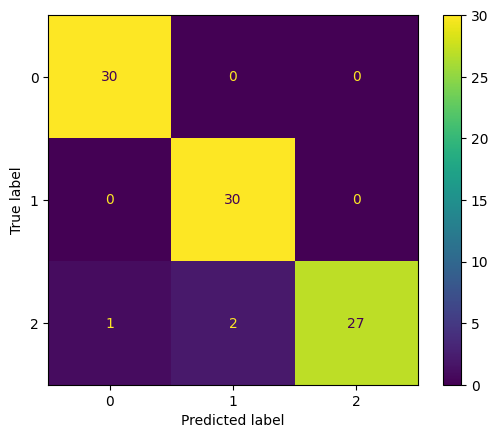

In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicciones, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot()
plt.show()